In [62]:
from google.colab import drive
import sys
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix 


# **Load data**

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/'

Mounted at /content/drive


In [ ]:
credit_transactions=pd.read_csv(abspath_curr+'df_data.csv',index_col=[0])
credit_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31406 entries, 0 to 786112
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Categ_country             31318 non-null  float64
 1   Categ_merchant            21922 non-null  float64
 2   creditLimit               31406 non-null  float64
 3   availableMoney            31406 non-null  float64
 4   CVVinMatch                31406 non-null  int64  
 5   transactionAmount         31406 non-null  float64
 6   cardPresent               31406 non-null  int64  
 7   expirationDateKeyInMatch  31406 non-null  int64  
 8   isFraud                   31406 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 2.4 MB


In [ ]:
credit_transactions.fillna(0, inplace=True)

In [ ]:
credit_transactions.isFraud.value_counts()

0    21189
1    10217
Name: isFraud, dtype: int64

# **Split Data Into Training And Testing Datasets**

In [ ]:
def train_test_data(df):
    q=df.shape[1]
    X=df.iloc[:,1:(q-1)]
    y=df.iloc[:,(q-1)]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = train_test_data(credit_transactions)

In [ ]:
# Number of fraud cases in training dataset
y_train.sum()

7172

In [ ]:
#Number of fraud cases in training dataset
y_test.sum()

3045

# **Modeling**

##**Logistic Regression Model**

In [41]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
lr_predictions = pd.Series(model.predict(X_test))
#y_test = y_test.reset_index(drop=True)
#z = pd.concat([y_test, y_pred], axis=1)
#z.columns = ['True', 'Prediction']
#z.head()

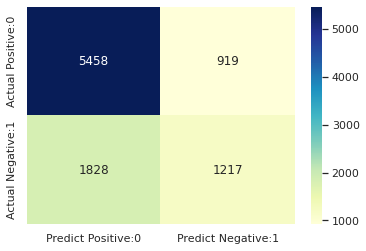

In [44]:
# Visualize confusion matrix with seaborn heatmap
lr_cm=confusion_matrix(y_test, lr_predictions)
lr_matrix = pd.DataFrame(data=lr_cm, columns=['Predict Positive:0', 'Predict Negative:1'], index=['Actual Positive:0', 'Actual Negative:1'])
sns.heatmap(lr_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [45]:
# Model Accuracy
print("Accuracy:",round(accuracy_score(y_test, lr_predictions),4))

Accuracy: 0.7084


In [46]:
# Precision Score on the test data
print("Precision Score:",round(precision_score(y_test, lr_predictions),4))

Precision Score: 0.5698


In [47]:
# Precision Score on the test data
print("F-1 Score:",round(f1_score(y_test, lr_predictions),4))

F-1 Score: 0.4698


##***Gradient Boosting Model***













In [ ]:
# Bulid the gradient boosting model and define the parameters
gb_model = GradientBoostingClassifier(n_estimators=800, 
                                 learning_rate=0.01,
                                 max_depth=6, 
                                 random_state=42)

#kf = KFold(n_splits=5,random_state=42,shuffle=True)

In [ ]:
# Fit the gradient boosting model and give the report
gb_model.fit(X_train,y_train)
print(classification_report(y_test,gb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80      6377
           1       0.58      0.39      0.47      3045

    accuracy                           0.71      9422
   macro avg       0.66      0.63      0.63      9422
weighted avg       0.69      0.71      0.69      9422



In [ ]:
# Take predictions on the test data
gb_predictions = gb_model.predict(X_test)

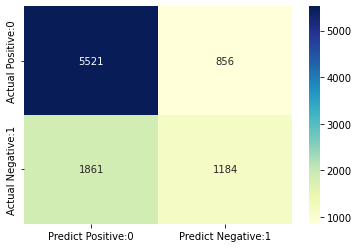

In [ ]:
# Visualize confusion matrix with seaborn heatmap
gb_cm=confusion_matrix(y_test, gb_predictions)
gb_matrix = pd.DataFrame(data=gb_cm, columns=['Predict Positive:0', 'Predict Negative:1'], index=['Actual Positive:0', 'Actual Negative:1'])
sns.heatmap(gb_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [ ]:
# Model Accuracy
print("Accuracy:",round(accuracy_score(y_test, gb_predictions),4))

Accuracy: 0.7116


In [ ]:
# Precision Score on the test data
print("Precision Score:",round(precision_score(y_test, gb_predictions),4))

Precision Score: 0.5804


In [ ]:
# Precision Score on the test data
print("F-1 Score:",round(f1_score(y_test, gb_predictions),4))

F-1 Score: 0.4657


##**XGBoosting Model**

In [ ]:
estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=123
)

In [ ]:
parameters=  { 'max_depth': range (5, 11,4),
    'n_estimators': range(800, 1000, 50),
    'learning_rate': [0.1, 0.01, 0.001]}

In [ ]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring='f1',
    n_jobs = 10,
    cv = 4,
    verbose=True
)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:  7.0min
[Parallel(n_jobs=10)]: Done  96 out of  96 | elapsed: 21.3min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=123, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': range(5, 11, 4),
                         'n_estimators': range(800, 1000, 50)},
  

In [24]:
grid_search.best_estimator_\\


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=850, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              silent=None, subsample=1, verbosity=1)

In [25]:
xgb_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=800, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              silent=None, subsample=1, verbosity=1)

In [26]:
#Fit the model
xgb_model.fit(X_train,y_train)

#Predict the model
xgb_predictions = xgb_model.predict(X_test)

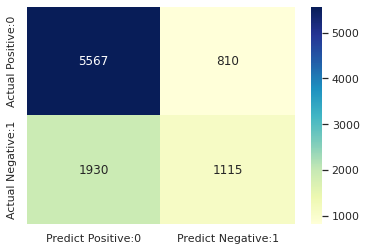

In [72]:
# visualize confusion matrix with seaborn heatmap
xgb_cm=confusion_matrix(y_test, xgb_predictions)

xgb_matrix = pd.DataFrame(data=xgb_cm, columns=['Predict Positive:0', 'Predict Negative:1'], index=['Actual Positive:0', 'Actual Negative:1'])
sns.heatmap(xgb_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [28]:
# check precision rate score on validation data
print("Accuracy:",round(accuracy_score(y_test, xgb_predictions),4))

Accuracy: 0.7092


In [29]:
# check precision rate score on validation data
print("Precision Score:",round(precision_score(y_test, xgb_predictions),4))

Precision Score: 0.5792


In [30]:
# check precision rate score on validation data
print("F-1 Score:",round(f1_score(y_test, xgb_predictions),4))

F-1 Score: 0.4487


## **Random Forest**

In [32]:
model_params = {'n_estimators':range(650,850,50),
    'max_depth': range(8,14),
    'min_samples_split':range(12,20)}

In [33]:
# create random forest classifier model
rf_model = RandomForestClassifier()

# set up random search meta-estimator
# this will train 50 models over 4 folds of cross validation (200 models total)
rf_cv = RandomizedSearchCV(rf_model, model_params, n_iter=20, cv=4, scoring='f1',random_state=43)

# train the random search meta-estimator to find the best model out of 100 candidates
model = rf_cv.fit(X_train, y_train)

model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
rf_model_para=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_model_para.fit(X_train,y_train)

rf_predictions=rf_model_para.predict(X_test)

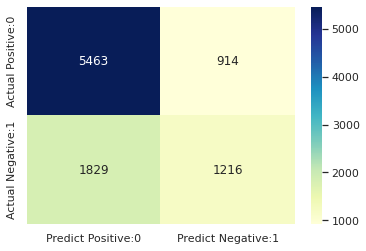

In [35]:
# visualize confusion matrix with seaborn heatmap
rf_cm=confusion_matrix(y_test, rf_predictions)
rf_matrix = pd.DataFrame(data=rf_cm, columns=['Predict Positive:0', 'Predict Negative:1'], index=['Actual Positive:0', 'Actual Negative:1'])
sns.heatmap(rf_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [36]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",round(accuracy_score(y_test, rf_predictions),4))

Accuracy: 0.7089


In [37]:
# Precision score on the test data
print("Precision Score:",round(precision_score(y_test,rf_predictions ),4))

Precision Score: 0.5709


In [38]:
# Precision score on the test data
print("F-1 Score:",round(f1_score(y_test, rf_predictions),4))

F-1 Score: 0.47


Text(0.5, 0, 'Random Forest Feature Importance')

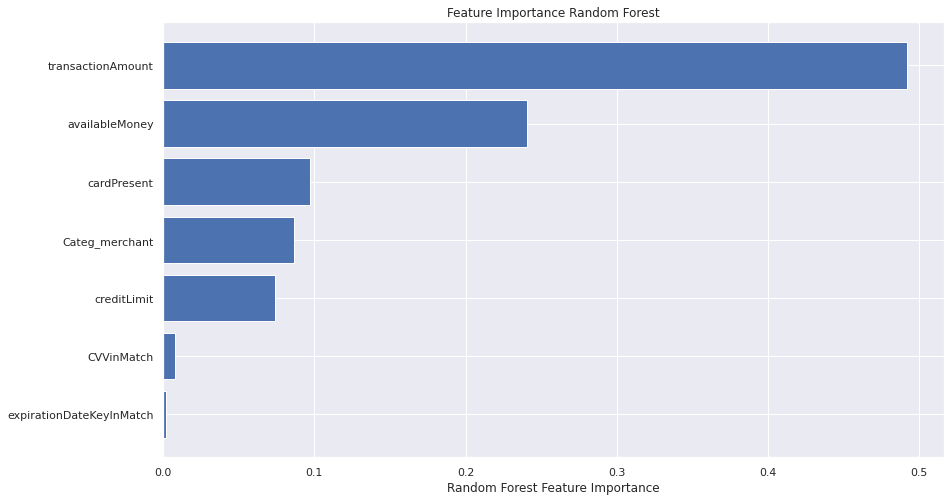

In [71]:
plt.figure(figsize=(14,8))
plt.title('Feature Importance Random Forest')
sns.set()
sorted_idx = rf_model_para.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rf_model_para.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

##ROC Curve

In [48]:
y_score_gb = gb_model.predict_proba(X_test)[:,1]
y_score_lr = lr_model.predict_proba(X_test)[:,1]
y_score_xgb = xgb_model.predict_proba(X_test)[:,1]
y_score_rf= rf_model_para.predict_proba(X_test)[:,1]



In [52]:
false_positive_lr, true_positive_lr, threshold_lr = roc_curve(y_test, y_score_lr)
false_positive_gb, true_positive_gb, threshold_gb = roc_curve(y_test, y_score_gb)
false_positive_xgb, true_positive_xgb, threshold_xgb = roc_curve(y_test, y_score_xgb)
false_positive_rf, true_positive_rf, threshold_rf= roc_curve(y_test, y_score_rf)

print('roc_auc_score for Logistic Regressio: ', roc_auc_score(y_test, y_score_lr))
print('roc_auc_score for XBoosting: ', roc_auc_score(y_test, y_score_gb))
print('roc_auc_score for GXBoosting: ', roc_auc_score(y_test, y_score_xgb))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score_rf))


roc_auc_score for Logistic Regressio:  0.6499143190339461
roc_auc_score for XBoosting:  0.7319182004911431
roc_auc_score for GXBoosting:  0.7239339961731315
roc_auc_score for Random Forest:  0.7332489784588653


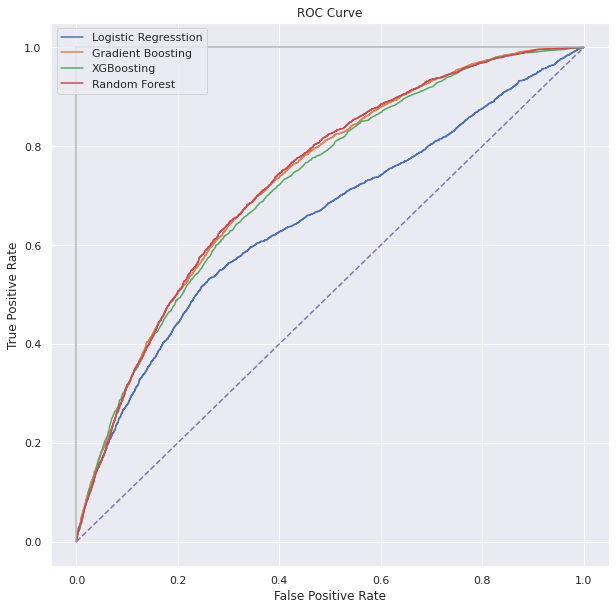

In [59]:
    plt.subplots(1, figsize=(10,10))
    plt.title('ROC Curve')
    plt.plot(false_positive_lr, true_positive_lr)
    plt.plot(false_positive_gb, true_positive_gb)
    plt.plot(false_positive_xgb, true_positive_xgb)
    plt.plot(false_positive_rf, true_positive_rf)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(['Logistic Regresstion','Gradient Boosting','XGBoosting','Random Forest'],loc="upper left")
    plt.show()

  

##Precision-Recall Curve

In [69]:
precision_lr1, recall_lr, _lr = precision_recall_curve(y_test,y_score_lr )
precision_gb1, recall_gb, _gb = precision_recall_curve(y_test,y_score_gb )
precision_xgb1, recall_xgb, _xgb = precision_recall_curve(y_test,y_score_xgb )
precision_rf1, recall_rf, _rf = precision_recall_curve(y_test,y_score_rf)

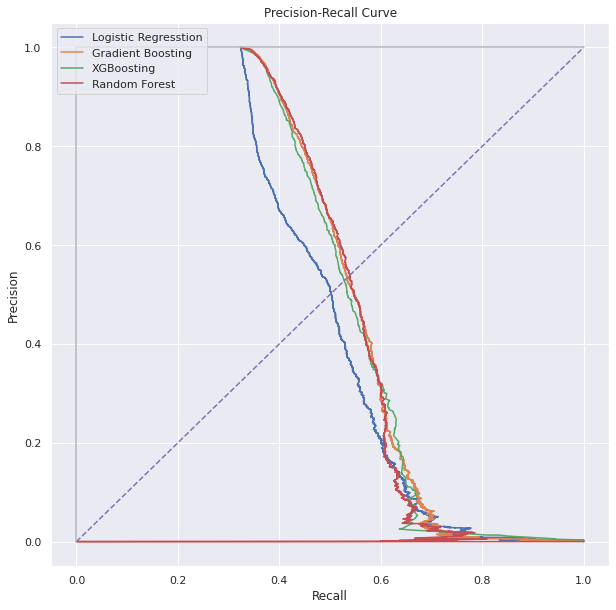

In [70]:
plt.subplots(1, figsize=(10,10))
plt.title('Precision-Recall Curve')
plt.plot(precision_lr1, recall_lr)
plt.plot(precision_gb1, recall_gb)
plt.plot(precision_xgb1, recall_xgb)
plt.plot(precision_rf1, recall_rf)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(['Logistic Regresstion','Gradient Boosting','XGBoosting','Random Forest'],loc="upper left")
plt.show()



*   From ROC Curve and Precision-Recall curve, the Random Forest model performed best.
*   The transaction amount is much more important based on the real world and feature importance table.
*   However, these four models can not give a more accurate predictions,either. Here are some reasons: the data is highly imbalanced. Fraud trasactions are too small to make any contributions for fraud detection. Besides, I dropped some variables and removed some rows, which also resulted in bad performance.





